# Test of eddy detection functions
### Using the eddies.py functions, to be modified to calculate all eddies in Lebreton data ###

*JASaa*

*ISAE-SUPAERO*

## Load data and import functions

In [1]:
from eddies import eddy_detection,print_eddies,plot_eddies,local_peaks,local_minima3D,find_local_mins

#name of the netCDF data file
filename = 'Lebreton_2015.nc'
# Confidence level, usually 90%
R2_criterion = 0.9
# OW value at which to begin the evaluation of R2
OW_start = -1.0
# Number of local minima to evaluate using R2 method.
# Set low (like 20) to see a few R2 eddies quickly.
# Set high (like 1e5) to find all eddies in domain.
max_evaluation_points = 1000
# Minimum number of cells required to be identified as an eddie.
min_eddie_cells = 1
# z-level to plot.  Usually set to 0 for the surface.
k_plot = 0

## Run R2 algorithm

In [2]:
%%capture
lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,cyclonic_mask = eddy_detection(filename,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)

## Print eddy census

In [3]:
print_eddies(eddie_census,nEddies)


Eddie census data

        minOW  circ(m^2/s)      lon(º)     lat(º)  cells  diameter(km)
1   -1.451520  3985.943538 -136.250000  41.333332   57.0     68.945464
2   -1.148975 -2670.269710 -140.583328  25.166666   45.0     67.552096
3   -1.543859 -2329.542998 -148.000000  41.416668   22.0     43.418354
4   -3.446879  5675.036081 -138.916672  38.250000  195.0    129.437899
5   -2.101672  4640.578106 -133.166672  38.250000  231.0    141.196321
6   -3.223597  4048.105005 -149.166672  28.583334   37.0     60.445337
7   -1.418155 -2837.997411 -136.500000  27.916666   47.0     68.167872
8   -1.676704 -5960.549725 -152.166672  26.833334   67.0     81.408312
9   -2.485161  3160.562536 -136.000000  39.166668   31.0     52.172058
10  -3.705740  3742.506924 -128.583328  40.500000   56.0     68.934736
11  -2.512745  3358.808968 -147.083328  35.000000  176.0    126.317701
12  -2.654029 -3419.790256 -132.333328  34.666668   36.0     57.706397
13  -5.076106  5110.534450 -138.833328  32.666668   68.0 

## Plot velocities and eddies

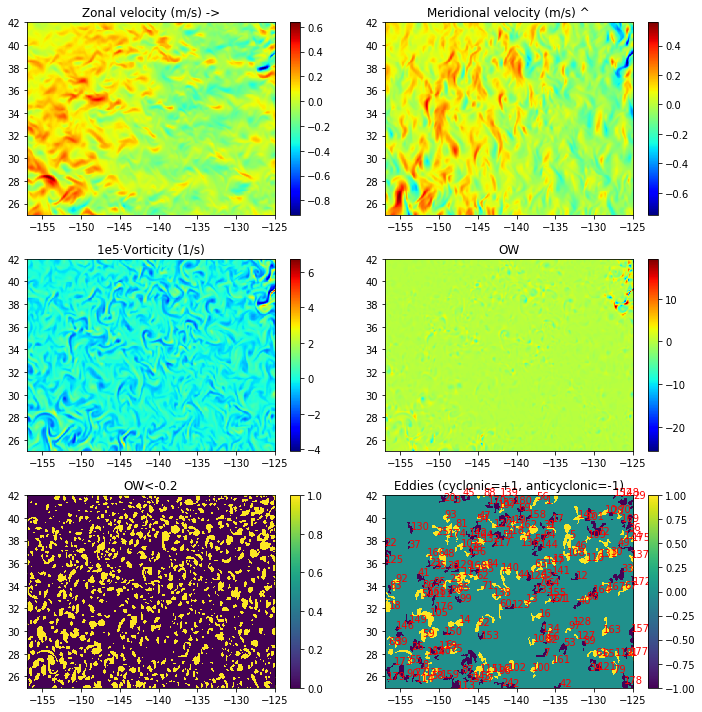

In [4]:
%matplotlib inline
plot_eddies(lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,cyclonic_mask,k_plot)

### Difference in time to calculate minima
The *local_peaks* takes much less time than the *find_local_mins* and takes into account the edges, which *local_minima3D* doesn't. It also finds more minima.

In [8]:
%%time
local_peaks(OW,OW_start,max_evaluation_points).shape

Wall time: 2.97 ms


(3, 1000)

In [9]:
%%time
local_minima3D(OW,OW_start,max_evaluation_points)[1].shape

Wall time: 2.01 ms


(3, 536)

In [10]:
%%time
find_local_mins(OW,OW_start,max_evaluation_points).shape

Wall time: 1.51 s


(3, 427)

### Difference in number of eddies found ###
The algorithm was run with the three minima funtions, can vary a little for the peaks and minima3D because of the use of random sampling.
#difference in eddies found for max_evaluation_points=1000

peaks = 179

minima3D = 178

local_mins = 220